In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# shift
data = [['01/01', 1000], ['01/02', 1200], ['01/03', 900], 
        ['01/04', 1200], ['01/05', 1500]]
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

,날짜,가격
0,01/01,1000
1,01/02,1200
2,01/03,900
3,01/04,1200
4,01/05,1500


In [3]:
df.shift()

,날짜,가격
0,None,NaN
1,01/01,1000.0
2,01/02,1200.0
3,01/03,900.0
4,01/04,1200.0


In [4]:
df.shift(-1)

,날짜,가격
0,01/02,1200.0
1,01/03,900.0
2,01/04,1200.0
3,01/05,1500.0
4,None,NaN


In [5]:
df.shift(axis=1)

,날짜,가격
0,None,01/01
1,None,01/02
2,None,01/03
3,None,01/04
4,None,01/05


In [6]:
df1 = df.copy()
df1['가격변동'] = df1['가격'] - df1['가격'].shift()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [7]:
df1['가격'].diff()

0      NaN
1    200.0
2   -300.0
3    300.0
4    300.0
Name: 가격, dtype: float64

In [8]:
df1 = df.copy()
df1['변동률'] = (df1['가격'] - df1['가격'].shift())/df1['가격'].shift()
df1

,날짜,가격,변동률
0,01/01,1000,NaN
1,01/02,1200,0.200000
2,01/03,900,-0.250000
3,01/04,1200,0.333333
4,01/05,1500,0.250000


In [9]:
df1['가격'].pct_change()

0         NaN
1    0.200000
2   -0.250000
3    0.333333
4    0.250000
Name: 가격, dtype: float64

In [10]:
# groupby
data1 = [['김판다', 'A', '남', 95], ['송중기', 'B', '남', 93],
         ['김나현', 'B', '여', 88], ['박효신', 'A', '남', 85],
         ['강승주', 'B', '여', 78], ['권보아', 'A', '여', 72]]

data2 = [['2021-01-01', '김판다', 10000], ['2021-01-01', '강승주', 2000],
         ['2021-01-02', '김판다', 20000], ['2021-01-02', '강승주', 5000],
         ['2021-01-03', '강승주', 8000], ['2021-01-03', '김판다', 5000]]

df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df1

,이름,반,성별,점수
0,김판다,A,남,95
1,송중기,B,남,93
2,김나현,B,여,88
3,박효신,A,남,85
4,강승주,B,여,78
5,권보아,A,여,72


In [11]:
df = df1.copy()
df['등수'] = df['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수
0,김판다,A,남,95,1.0
1,송중기,B,남,93,2.0
2,김나현,B,여,88,3.0
3,박효신,A,남,85,4.0
4,강승주,B,여,78,5.0
5,권보아,A,여,72,6.0


In [12]:
df['학급내등수'] = df.groupby('반')['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수,학급내등수
0,김판다,A,남,95,1.0,1.0
1,송중기,B,남,93,2.0,1.0
2,김나현,B,여,88,3.0,2.0
3,박효신,A,남,85,4.0,2.0
4,강승주,B,여,78,5.0,3.0
5,권보아,A,여,72,6.0,3.0


In [13]:
df['점수2'] = df.groupby(['반', '성별'])['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수,학급내등수,점수2
0,김판다,A,남,95,1.0,1.0,1.0
1,송중기,B,남,93,2.0,1.0,1.0
2,김나현,B,여,88,3.0,2.0,1.0
3,박효신,A,남,85,4.0,2.0,2.0
4,강승주,B,여,78,5.0,3.0,2.0
5,권보아,A,여,72,6.0,3.0,1.0


In [14]:
df.groupby('반')['점수'].mean()

반
A    84.000000
B    86.333333
Name: 점수, dtype: float64

In [15]:
df.groupby(['반', '성별'])['점수'].mean()

반  성별
A  남     90.0
   여     72.0
B  남     93.0
   여     83.0
Name: 점수, dtype: float64

In [16]:
df.groupby(['반', '성별'])['점수'].mean().unstack()

성별,남,여
반,,
A,90.0,72.0
B,93.0,83.0


In [17]:
df2

,날짜,이름,입금
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [18]:
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

,날짜,이름,입금,전일입금
0,2021-01-01,김판다,10000,NaN
1,2021-01-01,강승주,2000,NaN
2,2021-01-02,김판다,20000,10000.0
3,2021-01-02,강승주,5000,2000.0
4,2021-01-03,강승주,8000,5000.0
5,2021-01-03,김판다,5000,20000.0


### 파이썬 라이브러리를 통해 주식데이터 가져오기(Finance Data Reader)

In [19]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드

In [20]:
# 삼성전자(005930) 주가 데이터 2018-01-01부터 2020-12-31까지 가져오기
df1 = fdr.DataReader('005930', '2018-01-01', '2020-12-31')
# fdr.DataReader('005930', '2018', '2021')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 738 entries, 2018-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    738 non-null    int64  
 1   High    738 non-null    int64  
 2   Low     738 non-null    int64  
 3   Close   738 non-null    int64  
 4   Volume  738 non-null    int64  
 5   Change  738 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 40.4 KB


In [22]:
df1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

<Axes: xlabel='Date'>

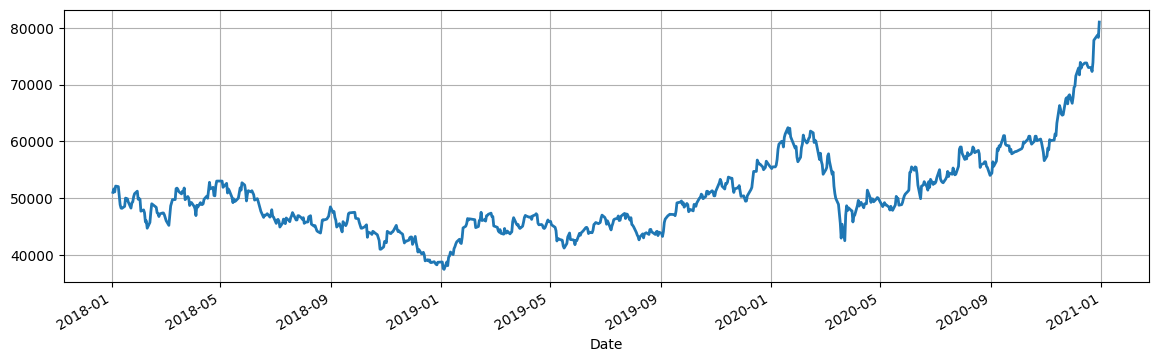

In [24]:
df1['Close'].plot()

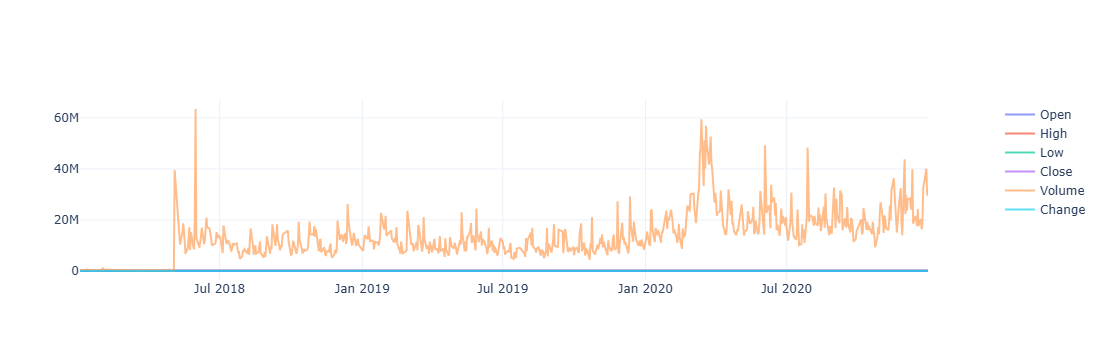

In [25]:
# 캔들차트 안나옴 빠진듯...
fdr.chart.plot(df1)

In [26]:
# 삼성전자와 카카오 두개 종목의 주가데이터 합쳐서 불러오기
stocks = ['005930', '035720']
df_ex1 = pd.DataFrame()
for i in stocks:
    df = fdr.DataReader(i, '2018', '2021')
    df['Code'] = i
    df_ex1 = pd.concat([df_ex1, df])
df_ex1

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,005930
2018-01-03,52540,52560,51420,51620,200270,0.011760,005930
2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930
...,...,...,...,...,...,...,...
2020-12-28,75168,75670,74164,74867,646464,-0.002678,035720
2020-12-29,76472,77375,75869,77175,857404,0.030828,035720
2020-12-30,77175,79082,76974,78179,813142,0.013009,035720


In [27]:
# KRX 사이트에서 현시점 기준 시가총액 상위 90개의 종목 리스트 가져오기
# http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201
df_stocks = pd.read_csv('data_1423_20250827.csv', encoding='cp949').iloc[:, [0,1,2,4,5,6,7,8,9,12]]
df_90 = df_stocks.sort_values('시가총액', ascending=False).iloc[:90, [0, 1]].reset_index(drop=True)
df_90

,종목코드,종목명
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
...,...,...
87,029780,삼성카드
88,088980,맥쿼리인프라
89,277810,레인보우로보틱스


In [28]:
stocks = df_90['종목코드']
df_ex1 = pd.DataFrame()
for i in stocks:
    df = fdr.DataReader(i, '2022', '2025')
    df['Code'] = i
    df_ex1 = pd.concat([df_ex1, df])
df_ex1

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,005930
2022-01-04,78800,79200,78300,78700,12427416,0.001272,005930
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,005930
...,...,...,...,...,...,...,...
2024-12-26,147300,148900,143000,143700,210771,-0.013727,277810
2024-12-27,144500,146500,138800,141200,144003,-0.017397,277810
2024-12-30,144000,163500,142000,162700,843433,0.152266,277810


In [29]:
# 날짜를 열로 만들고 종목명도 붙혀주기
# merge는 index를 날리기 때문에 date를 먼저 열로 만들어줌.
df_ex2 = df_ex1.reset_index().merge(df_90.set_axis(['Code', 'Stock'], axis=1), how='left')
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2022-01-03,79400,79800,78200,78600,13502112,0.003831,005930,삼성전자
1,2022-01-04,78800,79200,78300,78700,12427416,0.001272,005930,삼성전자
2,2022-01-05,78800,79000,76400,77400,25470640,-0.016518,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
64289,2024-12-26,147300,148900,143000,143700,210771,-0.013727,277810,레인보우로보틱스
64290,2024-12-27,144500,146500,138800,141200,144003,-0.017397,277810,레인보우로보틱스
64291,2024-12-30,144000,163500,142000,162700,843433,0.152266,277810,레인보우로보틱스


In [30]:
# 파일로 저장하기
df_ex2.to_csv('stocks.csv', index=False, encoding='cp949')

### 주식데이터 프로젝트

In [31]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
df_ex2 = pd.read_csv('stocks.csv', dtype={'Code':'str'}, encoding='cp949')
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2022-01-03,79400,79800,78200,78600,13502112,0.003831,005930,삼성전자
1,2022-01-04,78800,79200,78300,78700,12427416,0.001272,005930,삼성전자
2,2022-01-05,78800,79000,76400,77400,25470640,-0.016518,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
64289,2024-12-26,147300,148900,143000,143700,210771,-0.013727,277810,레인보우로보틱스
64290,2024-12-27,144500,146500,138800,141200,144003,-0.017397,277810,레인보우로보틱스
64291,2024-12-30,144000,163500,142000,162700,843433,0.152266,277810,레인보우로보틱스


In [32]:
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64292 entries, 0 to 64291
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    64292 non-null  object 
 1   Open    64292 non-null  int64  
 2   High    64292 non-null  int64  
 3   Low     64292 non-null  int64  
 4   Close   64292 non-null  int64  
 5   Volume  64292 non-null  int64  
 6   Change  64289 non-null  float64
 7   Code    64292 non-null  object 
 8   Stock   64292 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [33]:
# 2거래일 연속 20%이상 상승한 데이터 필터링
cond1 = df_ex2['Change'] >= 0.2
cond2 = df_ex2.groupby('Stock')['Change'].shift() >= 0.2
df_ex2[cond1 & cond2]

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
52178,2023-07-19,21126,25633,19915,25633,7152090,0.299782,087010,펩트론


In [34]:
# broad casting
data = [[83, 66, 72], [87, 94, 98], [62, 71, 69], [94, 92, 72]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
s1 = pd.Series([1, 2, 3], index=['국어', '영어', '수학'])
s2 = pd.Series([10, 0, 0, 10], index=list('ABCD'))

In [35]:
df

,국어,영어,수학
A,83,66,72
B,87,94,98
C,62,71,69
D,94,92,72


In [36]:
s1

국어    1
영어    2
수학    3
dtype: int64

In [37]:
df + s1

,국어,영어,수학
A,84,68,75
B,88,96,101
C,63,73,72
D,95,94,75


In [38]:
df.add(s2, axis = 0)

,국어,영어,수학
A,93,76,82
B,87,94,98
C,62,71,69
D,104,102,82


In [39]:
df > 70

,국어,영어,수학
A,True,False,True
B,True,True,True
C,False,True,False
D,True,True,True


In [40]:
df.mean()

국어    81.50
영어    80.75
수학    77.75
dtype: float64

In [41]:
df > df.mean()

,국어,영어,수학
A,True,False,False
B,True,True,True
C,False,False,False
D,True,True,False


In [42]:
df > df.mean(axis=1).values[:, None]

,국어,영어,수학
A,True,False,False
B,False,True,True
C,False,True,True
D,True,True,False


### 신규 상장 주식의 주가 변동 추이 알아보기

In [43]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/stocks.csv'
new = ['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [44]:
new

['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']

In [45]:
# 신규 상장 종목만 필터링
cond1 = df_ex2['Stock'] == '에코프로비엠'
df_ex2[cond1]

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠
...,...,...,...,...,...,...,...,...,...
13735,2020-12-28,41065,41065,40323,40917,956464,0.006073,247540,에코프로비엠
13736,2020-12-29,41213,43239,40793,41757,2382757,0.020529,247540,에코프로비엠
13737,2020-12-30,41732,42053,40817,42029,1337934,0.006514,247540,에코프로비엠


In [46]:
cond1 = df_ex2['Stock'].isin(new)
df_ex3 = df_ex2[cond1].copy()
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠
...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈


In [47]:
df_ex3['Stock'].unique()

array(['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈'], dtype=object)

In [48]:
# 상장일부터 지난 일수를 알려주는 Days열을 만들기
df_ex3['Days'] = df_ex3.groupby('Stock')['Date'].rank().astype('int')
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock,Days
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠,1
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠,2
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠,3
...,...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈,73
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈,74
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈,75


In [49]:
# 30일 내의 데이터만 필터링해서 종목별 종가를 피벗테이블로 만들기
cond2 = df_ex3['Days'] <= 30
df_ex4 = df_ex3[cond2].pivot_table('Close', index='Days', columns='Stock')
df_ex4

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,127000.0,15616.0,15300.0,62400.0,255420.0
2,165000.0,16975.0,16000.0,81100.0,198495.0
3,214500.0,17296.0,15650.0,73800.0,187110.0
...,...,...,...,...,...
28,192500.0,16554.0,13400.0,45500.0,178200.0
29,191500.0,16308.0,13350.0,44100.0,179190.0
30,191000.0,15789.0,13500.0,44050.0,172260.0


In [50]:
# 주가를 상장 첫날 종가의 비율로 나타내기
df_ex4 / df_ex4.iloc[0]

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.299213,1.087026,1.045752,1.299679,0.777132
3,1.688976,1.107582,1.022876,1.182692,0.732558
...,...,...,...,...,...
28,1.515748,1.060067,0.875817,0.729167,0.697674
29,1.507874,1.044314,0.872549,0.706731,0.701550
30,1.503937,1.011078,0.882353,0.705929,0.674419


In [51]:
# 요즘은 plotly로 대체
import bokeh.plotting as bp
bp.output_notebook()

Loading BokehJS ...

In [52]:
# 요즘은 plotly로 대체
import pandas_bokeh
print(pandas_bokeh.__version__)

0.5.5


In [53]:
import pandas as pd
import pandas_bokeh
# plot의 backend를 pandas bokeh로 바꾼다
pd.plotting.backend = "pandas_bokeh"

<Axes: xlabel='Days'>

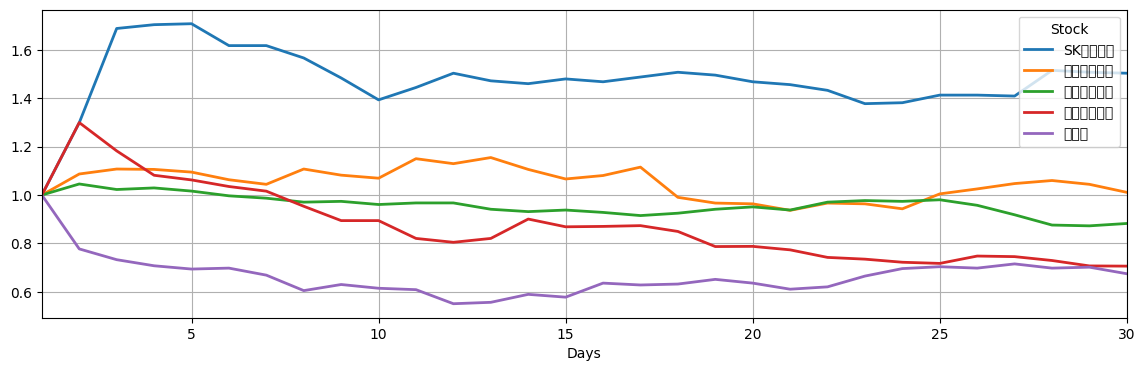

In [54]:
# 신규 상장 주식의 30일간 추이 그래프로 그리기
df_ex4.div(df_ex4.iloc[0]).plot(xlim=(1, 30))